In [164]:
%reload_ext autoreload
%autoreload 2

from alphadia.extraction import calibration

from alphabase.statistics.regression import LOESSRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pytest

# Calibrating a Single Property

Text(0, 0.5, 'mz_observed - mz_library')

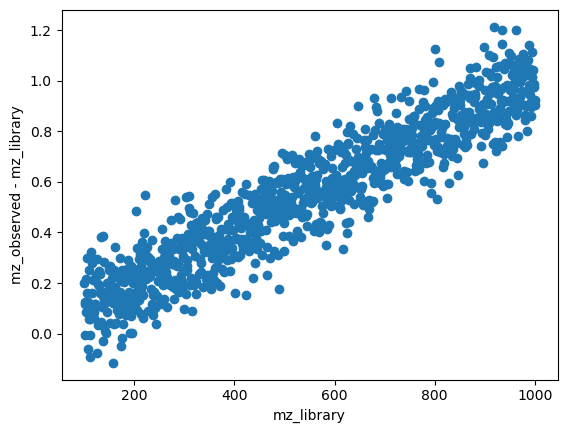

In [165]:
mz_library = np.linspace(100, 1000, 1000)
mz_observed = mz_library + np.random.normal(0, 0.1, 1000) + mz_library * 0.001
mz_df = pd.DataFrame({'mz_library': mz_library, 'mz_observed': mz_observed})

# We will calculate the difference between the observed and library mz values only for plotting purposes
mz_residual = mz_df['mz_observed'] - mz_df['mz_library']
plt.scatter(mz_df['mz_library'], mz_residual)
plt.xlabel('mz_library')
plt.ylabel('mz_observed - mz_library')

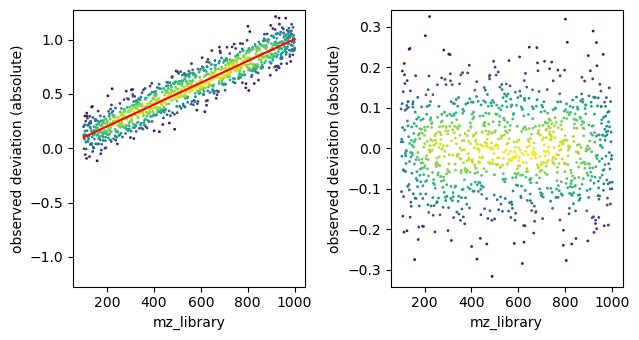

array([0.19459583])

In [166]:
# we will use a scikit-learn model to calibrate the mz values
from sklearn.linear_model import LinearRegression

# We will use a linear regression model to calibrate the mz values
mz_calibration = calibration.Calibration(
    name = 'mz_calibration',
    function = LinearRegression(),
    input_columns=['mz_library'],
    target_columns=['mz_observed'],
    output_columns=['mz_calibrated']
)

# The model is then fit to the data
mz_calibration.fit(mz_df, plot=True)

In [167]:
# The model can then be used to predict the calibrated mz values
# This happens in place by default
mz_calibration.predict(mz_df)
print(mz_df.head())

   mz_library  mz_observed  mz_calibrated
0  100.000000   100.198397     100.101341
1  100.900901   101.018920     101.003146
2  101.801802   101.798005     101.904952
3  102.702703   102.829059     102.806758
4  103.603604   103.688911     103.708563


In [168]:
# We can also get the 99% percentile error of the model
# It will return an numpy array with an element for every input column
print(mz_calibration.ci(mz_df, 0.99))

[0.25156891]


In [186]:
import tempfile
import os

path = os.path.join(tempfile.tempdir, 'mz_calibration.pkl')
mz_calibration.save(path)

mz_calibration_loaded = calibration.Calibration().load(path)
mz_calibration_loaded.predict(mz_df)
print(mz_df.head())

   mz_library  mz_observed  mz_calibrated
0  100.000000   100.198397     100.101341
1  100.900901   101.018920     101.003146
2  101.801802   101.798005     101.904952
3  102.702703   102.829059     102.806758
4  103.603604   103.688911     103.708563


# Calibrating a Single Property using Multiple Inputs

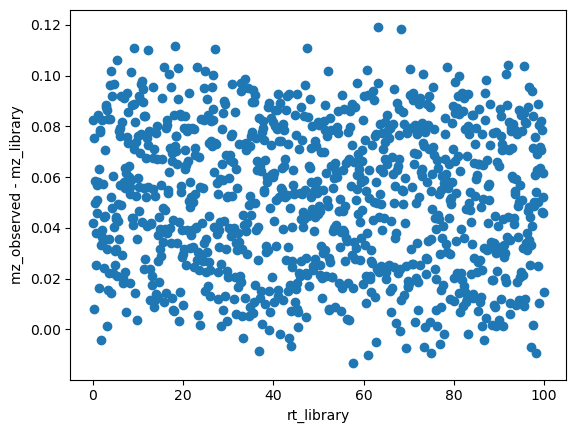

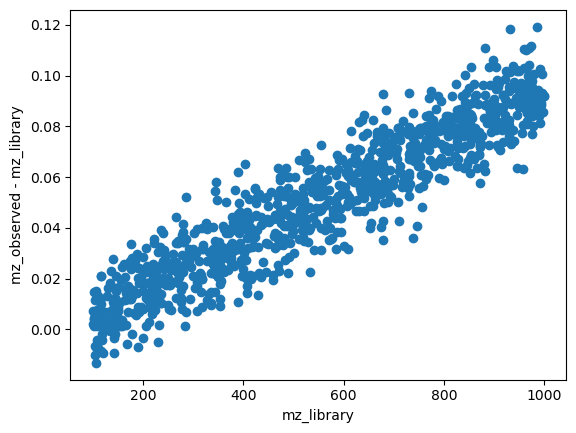

In [188]:
rt_library = np.linspace(0, 100, 1000)
mz_library = np.random.uniform(100, 1000, 1000)
mz_observed = mz_library + np.random.normal(0, 0.01, 1000) + mz_library * 0.0001 - rt_library * 0.0001
mz_df = pd.DataFrame({'rt_library': rt_library, 'mz_library': mz_library, 'mz_observed': mz_observed})

mz_residual = mz_df['mz_observed'] - mz_df['mz_library']
plt.scatter(mz_df['rt_library'], mz_residual)
plt.xlabel('rt_library')
plt.ylabel('mz_observed - mz_library')
plt.show()

plt.scatter(mz_df['mz_library'], mz_residual)
plt.xlabel('mz_library')
plt.ylabel('mz_observed - mz_library')
plt.show()

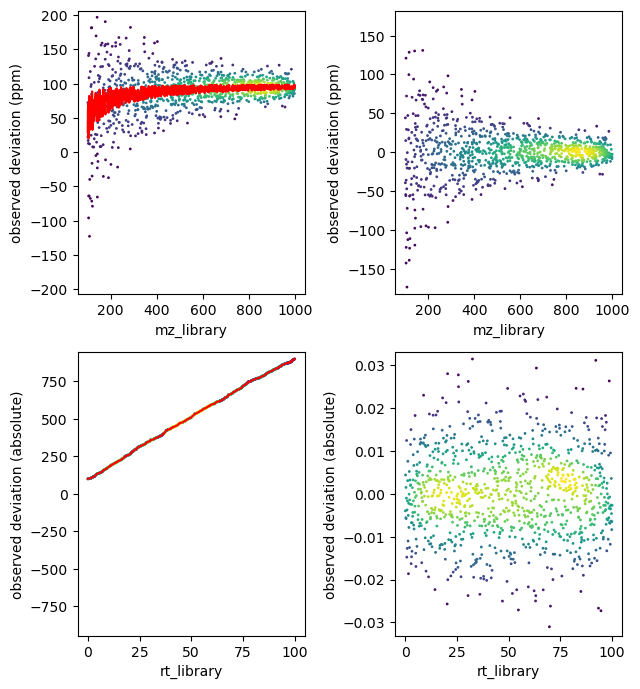

array([6.22526544e+01, 1.93666720e-02])

In [189]:
# We will use a linear regression model to calibrate the mz values
mz_calibration = calibration.Calibration(
    name = 'mz_calibration',
    function = LinearRegression(),
    input_columns=['mz_library', 'rt_library'],
    target_columns=['mz_observed'],
    output_columns=['mz_calibrated'],
    transform_deviation = [1e6,None]
)

# The model is then fit to the data
mz_calibration.fit(mz_df, plot=True)
